In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.decomposition import PCA
from astropy.io import fits

In [13]:
fits_file = "tess-s0001-3-3_36.820737_-82.019560_64x64_astrocut.fits"

In [14]:
with fits.open(fits_file, mode="readonly") as hdulist:
    time = hdulist[1].data["TIME"]
    flux = hdulist[1].data["FLUX"]

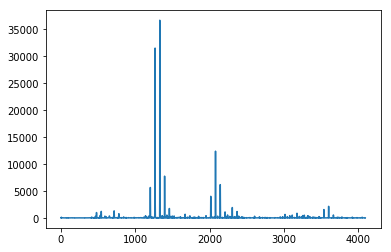

In [15]:
first_image = flux[0]
pixel_side = first_image.shape[0]
plt.plot(first_image.reshape(pixel_side*pixel_side))

Text(0.5, 0.83, '100 X 100 Pixel Cutout (Center)')

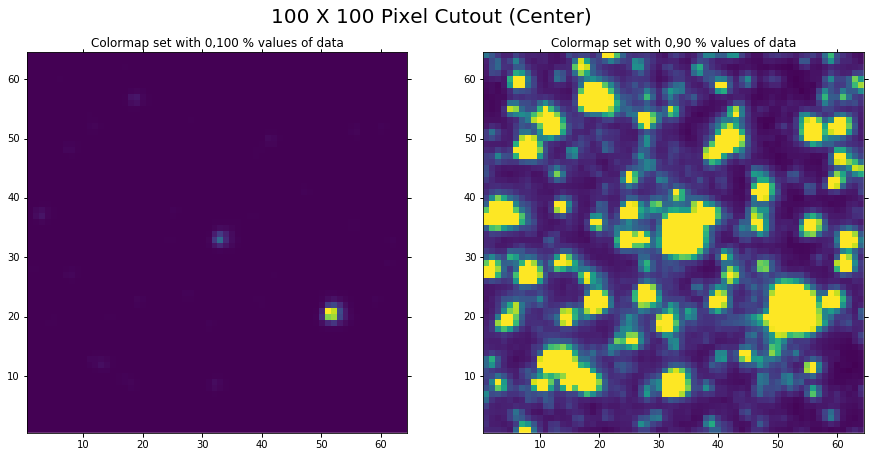

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,10), subplot_kw={"projection":wcs_info})

axs[0].imshow(first_image, origin="lower", 
           vmin=np.percentile(first_image, 0), vmax=np.percentile(first_image, 100))
# plt.title("TIC299779198 (Center) ")
axs[1].imshow(first_image, origin="lower", 
           vmin=np.percentile(first_image, 0), vmax=np.percentile(first_image, 90))
axs[0].set_title("Colormap set with 0,100 % values of data")
axs[1].set_title("Colormap set with 0,90 % values of data")
fig.suptitle("100 X 100 Pixel Cutout (Center)", x=0.5, y=0.83, fontsize=20)
# plt.savefig("64x64_cutout_TIC299779198.png", dpi=200)

In [ ]:
plt.figure(figsize=(12, 12))
lc_stack = flux.T.reshape(pixel_side*pixel_side, flux.shape[0])
plt.imshow(lc_stack, aspect="auto",
           vmin=np.percentile(lc_stack, 0), vmax=np.percentile(lc_stack, 90),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
plt.xlabel("Time(BJD - 2457000)[Days]", fontsize=15);
plt.ylabel("Pixel Index", fontsize=15);

In [ ]:
k = 7
pca = PCA(n_components=k)
pca.fit(lc_stack)
lc_stack_pca = pca.transform(lc_stack)
projected_lc_stack = pca.inverse_transform(lc_stack_pca)

In [ ]:
lc_stack.shape
lc_stack.mean(0).shape

In [ ]:
exp_var_ratio = pca.explained_variance_ratio_

n_row = 4
n_col = 2
fig, axs = plt.subplots(n_row, n_col, figsize=(15, 20))

axs[0, 0].plot(time, pca.mean_, ".", markersize=2)
# axs[0, 0].set_xlabel("Time(BJD - 2457000)[Days]", fontsize=10)
axs[0, 0].set_ylabel("Flux [e-/s]", fontsize=10)
axs[0, 0].set_title("Mean value across pixels")

for i in range(1, k+1):
    axs[i // n_col, i % n_col].plot(time, pca.components_[i-1], ".", markersize=2)
#     axs[i // n_col, i % n_col].set_xlabel("Time(BJD - 2457000)[Days]", fontsize=10)
    axs[i // n_col, i % n_col].set_ylabel("PCA", fontsize=10)
    axs[i // n_col, i % n_col].set_title("k={} Explained Variance Ratio: {:.2e}".format(i, exp_var_ratio[i-1]), 
                                         fontsize=10)
    
fig.suptitle("Mean & First k={} Principal Components (Eigenlightcurves)".format(k), y=0.91, fontsize=15);
# plt.savefig("eigenlightcurves_TIC299779198.png", dpi=200)

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(lc_stack, aspect="auto",
           vmin=np.percentile(lc_stack, 0), vmax=np.percentile(lc_stack, 90),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
plt.xlabel("Time(BJD - 2457000)[Days]", fontsize=15);
plt.ylabel("Pixel Index", fontsize=15);
plt.title("Data")

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(projected_lc_stack, aspect="auto",
           vmin=np.percentile(lc_stack, 0), vmax=np.percentile(lc_stack, 90),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
plt.xlabel("Time(BJD - 2457000)[Days]", fontsize=15);
plt.ylabel("Pixel Index", fontsize=15);
plt.title("Model");

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

diff = lc_stack-projected_lc_stack
cmap_ref = lc_stack[:, 0]

axs[0].imshow(lc_stack, aspect="auto",
           vmin=np.percentile(cmap_ref, 0), vmax=np.percentile(cmap_ref, 90),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
axs[1].imshow(projected_lc_stack, aspect="auto",
           vmin=np.percentile(cmap_ref, 0), vmax=np.percentile(cmap_ref, 90),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
c = axs[2].imshow(diff, aspect="auto",
           vmin=np.percentile(cmap_ref, 0), vmax=np.percentile(cmap_ref, 90),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
cbaxes = fig.add_axes([0.92, 0.12, 0.03, 0.76])
fig.colorbar(c, cax = cbaxes)

axs[0].set_xlabel("Time(BJD - 2457000)[Days]", fontsize=12)
axs[0].set_ylabel("Pixel Index", fontsize=12);
axs[0].set_title("Data")
axs[1].set_title("Model reconstructed using k={} eigenlightcurves".format(k))
axs[2].set_title("Difference (Data - Model)")
fig.suptitle("Pixel-level Lightcurves (Cmap set with 0, 90 % values of Data)", fontsize=15)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

cmap_ref = diff[:, 0]
cmap_low = 5
cmap_high = 95

axs[0].imshow(lc_stack, aspect="auto",
           vmin=np.percentile(cmap_ref, cmap_low), vmax=np.percentile(cmap_ref, cmap_high),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
axs[1].imshow(projected_lc_stack, aspect="auto",
           vmin=np.percentile(cmap_ref, cmap_low), vmax=np.percentile(cmap_ref, cmap_high),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
c = axs[2].imshow(diff, aspect="auto",
           vmin=np.percentile(cmap_ref, cmap_low), vmax=np.percentile(cmap_ref, cmap_high),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
cbaxes = fig.add_axes([0.92, 0.12, 0.03, 0.76])
fig.colorbar(c, cax = cbaxes)


axs[0].set_ylabel("Pixel Index", fontsize=12);
axs[0].set_title("Data")
axs[1].set_title("Model reconstructed using k={} eigenlightcurves".format(k))
axs[2].set_title("Difference (Data - Model)")
fig.suptitle("Pixel-level Lightcurves (Cmap set with {}, {} % values of Difference)".format(cmap_low, cmap_high),
             fontsize=15)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

cmap_ref = diff
cmap_low = 10
cmap_high = 90

axs[0].imshow(lc_stack, aspect="auto",
           vmin=np.percentile(cmap_ref, cmap_low), vmax=np.percentile(cmap_ref, cmap_high),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
axs[1].imshow(projected_lc_stack, aspect="auto",
           vmin=np.percentile(cmap_ref, cmap_low), vmax=np.percentile(cmap_ref, cmap_high),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
c = axs[2].imshow(diff, aspect="auto",
           vmin=np.percentile(cmap_ref, cmap_low), vmax=np.percentile(cmap_ref, cmap_high),
           origin="lower", extent=[time[0], time[-1], 0, pixel_side**2])
cbaxes = fig.add_axes([0.92, 0.12, 0.03, 0.76])
fig.colorbar(c, cax = cbaxes)


axs[0].set_ylabel("Pixel Index", fontsize=12);
axs[0].set_title("Data")
axs[1].set_title("Model reconstructed using k={} eigenlightcurves".format(k))
axs[2].set_title("Difference (Data - Model)")
fig.suptitle("Pixel-level Lightcurves (Cmap set with {}, {} % values of Difference)", fontsize=15)

In [ ]:
diff_images = diff.reshape(64, 64, diff.shape[-1]).T

fig = plt.figure(figsize=(12, 12))

cmap_low = 5
cmap_high = 90

plt.imshow(diff_images[0],
           vmin=np.percentile(diff_images[0], cmap_low), vmax=np.percentile(diff_images[0], cmap_high),
           origin="lower")

In [ ]:
from IPython.display import HTML

fig, axs = plt.subplots(1, 2, figsize=(15, 12));

ims = []
for i in range(0, diff_images.shape[0], 100):
    im1 = axs[0].imshow(diff_images[i], origin="lower", animated=True,
                   vmin=np.percentile(diff_images[0], cmap_low), vmax=np.percentile(diff_images[0], cmap_high))
    im2 = axs[1].imshow(diff, origin="lower",
                   vmin=np.percentile(diff[0], cmap_low), vmax=np.percentile(diff[0], cmap_high))
    ims.append([im1, im2]);
# fig.colorbar(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())

In [ ]:
fig = plt.figure(figsize=(12, 12));

image_stack = lc_stack.reshape(64, 64, lc_stack.shape[-1]).T

ims = []
for i in range(0, image_stack.shape[0], 4):
    im = plt.imshow(image_stack[i], origin="lower", animated=True,
                   vmin=np.percentile(image_stack[0], 0), vmax=np.percentile(image_stack[0], 20));
    ims.append([im]);
fig.colorbar(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())

In [ ]:
fig = plt.figure(figsize=(12, 12));

proj_image_stack = projected_lc_stack.reshape(64, 64, lc_stack.shape[-1]).T

ims = []
for i in range(0, image_stack.shape[0], 10):
    im = plt.imshow(proj_image_stack[i], origin="lower", animated=True,
                   vmin=np.percentile(proj_image_stack[0], 0), 
                   vmax=np.percentile(proj_image_stack[0], 20));
    ims.append([im]);
fig.colorbar(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())

In [ ]:
flux[0]

In [ ]:
flux.reshape(64*64, flux.shape[0])[:,0]

In [ ]:
2000 // 64

In [ ]:
2000 % 64

In [ ]:
x = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
x.shape
plt.imshow(x[0], origin="lower")

In [ ]:
y = x.T.reshape(3*3, 2)
y

In [ ]:
im = plt.imshow(y, origin="lower")
plt.colorbar(im)